In [1]:
import pandas as pd
df = pd.read_csv('sbi_customer.csv')
df.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


**Data Dictionary**

- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

In [2]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [3]:
df_notnull = df.dropna().copy()
rel_cols = [col for col in df_notnull.columns if col!="CUST_ID"]
df_rel = df_notnull[rel_cols].copy()

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
s = StandardScaler()
x = s.fit_transform(df_rel)

In [6]:
from sklearn.cluster import KMeans

In [7]:
clusters = list(range(1,10))
wss = []
for k in clusters:
    mod = KMeans(n_clusters=k)
    mod = mod.fit(x)
    wss.append(mod.inertia_)

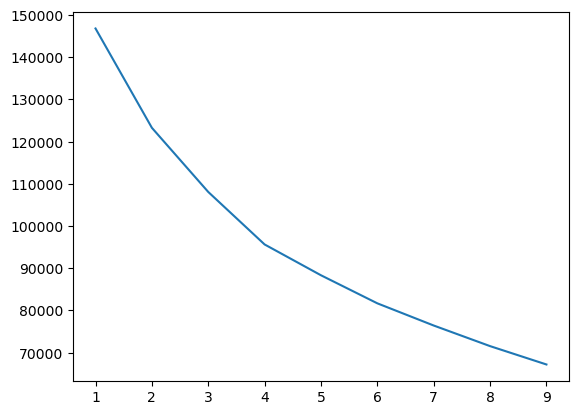

In [8]:
import matplotlib.pyplot as plt
plt.plot(clusters,wss,"-")

In [9]:
mod4 = KMeans(n_clusters=4)
mod4 = mod4.fit(x)

In [10]:
def get_profile(data,mod):
    data['clusters'] = mod.labels_
    cluster_means = data.groupby('clusters').mean().T
    global_means = data.mean().drop('clusters')
    global_std = data.std().drop('clusters')
    combined = pd.concat([cluster_means,global_means,global_std],axis=1)
    combined.columns = [l for l in set(mod.labels_)]+['global_mean','global_std']
    for l in set(mod.labels_):
        combined[f'z_{l}'] = (combined[l]-combined['global_mean'])/combined['global_std']
    num_clusters = df_notnull.groupby('clusters').size()
    num_clusters= pd.DataFrame(num_clusters).T
    num_clusters.index = ['num_items']
    cols = [l for l in set(mod.labels_)]+[f'z_{l}' for l in set(mod.labels_)]+['global_mean','global_std']
    return pd.concat([combined,num_clusters],axis=0)[cols]

In [11]:
get_profile(df_notnull,mod4)

/var/folders/7h/01sjg2sx6tl3y72r2klm24c80000gn/T/ipykernel_15897/3400181581.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  global_means = data.mean().drop('clusters')
/var/folders/7h/01sjg2sx6tl3y72r2klm24c80000gn/T/ipykernel_15897/3400181581.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  global_std = data.std().drop('clusters')


,0,1,2,3,z_0,z_1,z_2,z_3,global_mean,global_std
BALANCE,1059.175699,3589.193728,4648.950238,917.129539,-0.258664,0.948652,1.454365,-0.326448,1601.224893,2095.571300
BALANCE_FREQUENCY,0.819020,0.987670,0.969179,0.946277,-0.365989,0.446008,0.356981,0.246714,0.895035,0.207697
PURCHASES,275.109121,7843.311228,503.278454,1269.738766,-0.346233,3.146072,-0.240946,0.112733,1025.433874,2167.107984
ONEOFF_PURCHASES,211.852085,5228.017417,318.415743,611.868228,-0.233360,2.744817,-0.170091,0.004136,604.901438,1684.307803
INSTALLMENTS_PURCHASES,63.535473,2616.828338,184.950509,658.152541,-0.389545,2.394109,-0.257176,0.258719,420.843533,917.245182
CASH_ADVANCE,603.983356,663.280441,4581.705680,219.228299,-0.183926,-0.155975,1.691068,-0.365290,994.175523,2121.458303
PURCHASES_FREQUENCY,0.175836,0.945443,0.289396,0.888273,-0.797871,1.120044,-0.514872,0.977571,0.496000,0.401273
ONEOFF_PURCHASES_FREQUENCY,0.088368,0.741297,0.139345,0.302405,-0.391734,1.784307,-0.221839,0.321597,0.205909,0.300054
PURCHASES_INSTALLMENTS_FREQUENCY,0.083706,0.786616,0.187102,0.715251,-0.716202,1.049492,-0.456471,0.870226,0.368820,0.398093
CASH_ADVANCE_FREQUENCY,0.118667,0.071375,0.487291,0.043886,-0.093845,-0.328207,1.732912,-0.464433,0.137604,0.201791
